In [72]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
symbol=str(input("Enter the company Symbol"))
df = pd.read_csv("dataset/stock_dataset/"+symbol+".csv")
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2008-05-26,BAJAJ-AUTO,EQ,2101.05,898.00,898.00,551.35,600.25,604.75,624.61,3972485,2.481245e+14,NaN,1202933,0.3028
1,2008-05-27,BAJAJ-AUTO,EQ,604.75,624.70,639.00,580.30,595.50,593.15,606.43,1751063,1.061901e+14,NaN,369389,0.2110
2,2008-05-28,BAJAJ-AUTO,EQ,593.15,561.65,621.90,561.65,605.10,608.15,608.75,1652355,1.005877e+14,NaN,898602,0.5438
3,2008-05-29,BAJAJ-AUTO,EQ,608.15,619.40,619.40,576.00,600.00,599.45,600.98,669269,4.022165e+13,NaN,449951,0.6723
4,2008-05-30,BAJAJ-AUTO,EQ,599.45,605.40,607.00,538.00,576.25,571.70,565.55,1262117,7.137937e+13,NaN,936432,0.7420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3197,2021-04-26,BAJAJ-AUTO,EQ,3672.50,3682.20,3749.00,3676.00,3739.00,3738.85,3719.79,480016,1.785560e+14,36835.0,155563,0.3241
3198,2021-04-27,BAJAJ-AUTO,EQ,3738.85,3738.85,3798.00,3727.20,3795.00,3785.50,3764.89,518487,1.952048e+14,47765.0,140987,0.2719
3199,2021-04-28,BAJAJ-AUTO,EQ,3785.50,3810.05,3954.00,3807.00,3887.15,3889.75,3909.99,1252958,4.899048e+14,78857.0,190766,0.1523
3200,2021-04-29,BAJAJ-AUTO,EQ,3889.75,3943.00,3954.30,3807.10,3818.95,3836.45,3880.32,1335444,5.181950e+14,92106.0,168500,0.1262


In [74]:
df.isna().sum()

Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                746
Deliverable Volume      0
%Deliverble             0
dtype: int64

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3202 entries, 0 to 3201
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3202 non-null   object 
 1   Symbol              3202 non-null   object 
 2   Series              3202 non-null   object 
 3   Prev Close          3202 non-null   float64
 4   Open                3202 non-null   float64
 5   High                3202 non-null   float64
 6   Low                 3202 non-null   float64
 7   Last                3202 non-null   float64
 8   Close               3202 non-null   float64
 9   VWAP                3202 non-null   float64
 10  Volume              3202 non-null   int64  
 11  Turnover            3202 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  3202 non-null   int64  
 14  %Deliverble         3202 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 375.4

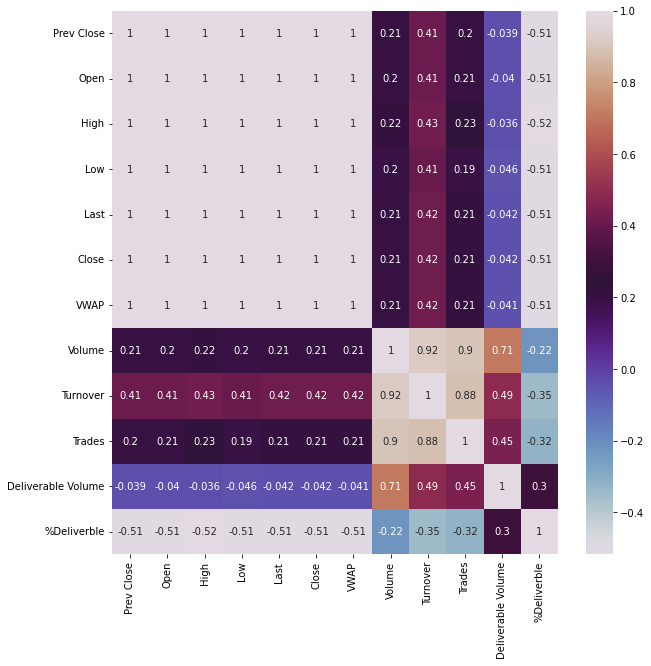

In [76]:
fig , ax = plt.subplots(figsize=(10,10))
dataplot = sns.heatmap(df.corr(),cmap="twilight",annot=True)

In [77]:
data = df[['Date','Open','High','Low','Volume','VWAP']]

In [78]:
df.set_index("Date",drop=False,inplace=True)

Text(0.5, 1.0, 'BAJAJ-AUTO')

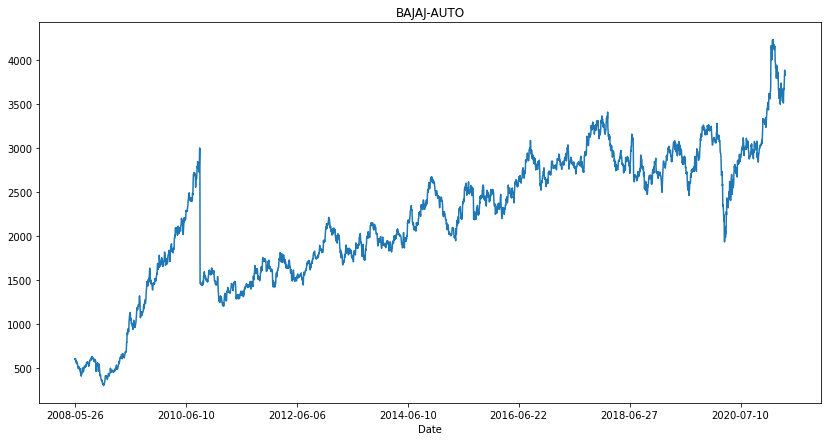

In [79]:
df.Close.plot(figsize=(14,7))
plt.title(symbol)

In [80]:
df.reset_index(drop=True,inplace=True)
lag_features = ["Open","High","Low","VWAP"]
Window1 = 3
Window2 = 7

df_rolled_3d = df[lag_features].rolling(window=Window1,min_periods=0)
df_mean_3d = df_rolled_3d.mean().shift(1).reset_index().astype(np.float32)

df_rolled_7d = df[lag_features].rolling(window=Window2,min_periods=0)
df_std_7d = df_rolled_7d.std().shift(1).reset_index().astype(np.float32)
for feature in lag_features:
    df[f"{feature}_mean_lag{Window1}"] = df_mean_3d[feature].astype('float32')
    df[f"{feature}_std_lag{Window2}"] = df_std_7d[feature].astype('float32')

In [81]:
df.fillna(df.mean(),inplace=True)

/tmp/ipykernel_16787/2085774198.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(),inplace=True)


In [82]:
df.set_index("Date",drop=False,inplace=True)
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Deliverable Volume,%Deliverble,Open_mean_lag3,Open_std_lag7,High_mean_lag3,High_std_lag7,Low_mean_lag3,Low_std_lag7,VWAP_mean_lag3,VWAP_std_lag7
Date,,,,,,,,,,,,,,,,,,,,,
2008-05-26,2008-05-26,BAJAJ-AUTO,EQ,2101.05,898.00,898.0,551.35,600.25,604.75,624.61,...,1202933,0.3028,2190.082275,39.497185,2218.420898,37.408077,2160.687988,37.761440,2189.748779,36.497482
2008-05-27,2008-05-27,BAJAJ-AUTO,EQ,604.75,624.70,639.0,580.30,595.50,593.15,606.43,...,369389,0.2110,898.000000,39.497185,898.000000,37.408077,551.349976,37.761440,624.609985,36.497482
2008-05-28,2008-05-28,BAJAJ-AUTO,EQ,593.15,561.65,621.9,561.65,605.10,608.15,608.75,...,898602,0.5438,761.349976,193.252289,768.500000,183.140656,565.825012,20.470741,615.520020,12.855202
2008-05-29,2008-05-29,BAJAJ-AUTO,EQ,608.15,619.40,619.4,576.00,600.00,599.45,600.98,...,449951,0.6723,694.783325,178.792023,719.633362,154.706512,564.433350,14.674326,613.263306,9.894732
2008-05-30,2008-05-30,BAJAJ-AUTO,EQ,599.45,605.40,607.0,538.00,576.25,571.70,565.55,...,936432,0.7420,601.916687,150.770416,626.766663,135.896103,572.650024,13.304292,605.386658,10.148426


In [83]:
df.Date = pd.to_datetime(df.Date, format="%Y-%m-%d")
df["month"] = df.Date.dt.month
df["day"] = df.Date.dt.day
df["day_of_week"] = df.Date.dt.dayofweek
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Open_std_lag7,High_mean_lag3,High_std_lag7,Low_mean_lag3,Low_std_lag7,VWAP_mean_lag3,VWAP_std_lag7,month,day,day_of_week
Date,,,,,,,,,,,,,,,,,,,,,
2008-05-26,2008-05-26,BAJAJ-AUTO,EQ,2101.05,898.00,898.0,551.35,600.25,604.75,624.61,...,39.497185,2218.420898,37.408077,2160.687988,37.761440,2189.748779,36.497482,5,26,0
2008-05-27,2008-05-27,BAJAJ-AUTO,EQ,604.75,624.70,639.0,580.30,595.50,593.15,606.43,...,39.497185,898.000000,37.408077,551.349976,37.761440,624.609985,36.497482,5,27,1
2008-05-28,2008-05-28,BAJAJ-AUTO,EQ,593.15,561.65,621.9,561.65,605.10,608.15,608.75,...,193.252289,768.500000,183.140656,565.825012,20.470741,615.520020,12.855202,5,28,2
2008-05-29,2008-05-29,BAJAJ-AUTO,EQ,608.15,619.40,619.4,576.00,600.00,599.45,600.98,...,178.792023,719.633362,154.706512,564.433350,14.674326,613.263306,9.894732,5,29,3
2008-05-30,2008-05-30,BAJAJ-AUTO,EQ,599.45,605.40,607.0,538.00,576.25,571.70,565.55,...,150.770416,626.766663,135.896103,572.650024,13.304292,605.386658,10.148426,5,30,4


In [84]:
df = df.drop(columns=['Symbol'])
df = df.drop(columns=['Series'])

In [85]:
df_train = df[df.Date < "2018"]
df_valid = df[df.Date >= "2018"]

In [86]:
df_valid.shape

(823, 24)

In [87]:
import tensorflow
from sklearn.preprocessing import MinMaxScaler

In [88]:
df_train.head().T

Date,2008-05-26,2008-05-27,2008-05-28,2008-05-29,2008-05-30
Date,2008-05-26 00:00:00,2008-05-27 00:00:00,2008-05-28 00:00:00,2008-05-29 00:00:00,2008-05-30 00:00:00
Prev Close,2101.05,604.75,593.15,608.15,599.45
Open,898.0,624.7,561.65,619.4,605.4
High,898.0,639.0,621.9,619.4,607.0
Low,551.35,580.3,561.65,576.0,538.0
Last,600.25,595.5,605.1,600.0,576.25
Close,604.75,593.15,608.15,599.45,571.7
VWAP,624.61,606.43,608.75,600.98,565.55
Volume,3972485,1751063,1652355,669269,1262117
Turnover,248124475790000.0,106190068700000.0,100587748930000.0,40221651265000.0,71379372060000.0


In [89]:
y_train = df_train["Close"]
scaler = MinMaxScaler(feature_range=(0,1))
y_train1 = scaler.fit_transform(np.array(df_train['Close']).reshape(-1,1))
y_train = df_train["Close"].to_numpy().reshape(-1,1)

In [90]:
y_valid = df_valid["Close"]
scaler1 = MinMaxScaler(feature_range=(0,1))
y_valid1 = scaler1.fit_transform(np.array(df_valid['Close']).reshape(-1,1))
y_validn = df_valid["Close"].to_numpy().reshape(-1,1)

In [91]:
X_train = df_train.drop(columns=['Close'])
X_train1 = X_train.drop("Date",axis=1)
X_train1 = (X_train1-X_train1.min())/(X_train1.max()-X_train1.min())
X_train2 = pd.concat((X_train1, X_train.Date),1)

/tmp/ipykernel_16787/332990013.py:4: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  X_train2 = pd.concat((X_train1, X_train.Date),1)


In [92]:
X_valid = df_valid.drop(columns=['Close'])
X_valid1 = X_valid.drop("Date",axis=1)
X_valid1 = (X_valid1-X_valid1.min())/(X_valid1.max()-X_valid1.min())
X_valid2 = pd.concat((X_valid1, X_valid.Date),1)

/tmp/ipykernel_16787/3153633140.py:4: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  X_valid2 = pd.concat((X_valid1, X_valid.Date),1)


In [93]:
X_train3 = X_train2.drop(columns=['Date']).to_numpy()
X_valid3 = X_valid2.drop(columns=['Date']).to_numpy()


In [94]:
y_train1 = y_train1.reshape(-1,1)
y_valid1 = y_valid1.reshape(-1,1)

In [95]:
import xgboost as xgb
import sklearn
from xgboost import XGBRegressor
from xgboost import plot_importance

In [96]:
xgb = XGBRegressor(n_estimatores=1000)

In [97]:
xgb = XGBRegressor(learning_rate=0.01)

In [98]:
xgb = XGBRegressor(max_depth=5)

In [99]:
xgb.fit(X_train3,y_train1,eval_set=[(X_train3,y_train1),(X_valid3,y_valid1)],early_stopping_rounds=100,verbose=True)

[0]	validation_0-rmse:0.15980	validation_1-rmse:0.11908
[1]	validation_0-rmse:0.11256	validation_1-rmse:0.08551
[2]	validation_0-rmse:0.07930	validation_1-rmse:0.06138
[3]	validation_0-rmse:0.05590	validation_1-rmse:0.04421
[4]	validation_0-rmse:0.03947	validation_1-rmse:0.03207
[5]	validation_0-rmse:0.02790	validation_1-rmse:0.02395
[6]	validation_0-rmse:0.01977	validation_1-rmse:0.01841
[7]	validation_0-rmse:0.01409	validation_1-rmse:0.01454
[8]	validation_0-rmse:0.01014	validation_1-rmse:0.01190
[9]	validation_0-rmse:0.00741	validation_1-rmse:0.01020
[10]	validation_0-rmse:0.00554	validation_1-rmse:0.00899
[11]	validation_0-rmse:0.00431	validation_1-rmse:0.00830
[12]	validation_0-rmse:0.00349	validation_1-rmse:0.00786
[13]	validation_0-rmse:0.00296	validation_1-rmse:0.00754
[14]	validation_0-rmse:0.00263	validation_1-rmse:0.00741
[15]	validation_0-rmse:0.00241	validation_1-rmse:0.00728
[16]	validation_0-rmse:0.00228	validation_1-rmse:0.00717
[17]	validation_0-rmse:0.00219	validation

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [100]:
xgb = XGBRegressor(n_estimators=1000,learning_rate=0.01)
xgb

xgb.fit(X_train3,y_train1,eval_set=[(X_train3,y_train1),(X_valid3,y_valid1)],early_stopping_rounds=100,verbose=True)

[0]	validation_0-rmse:0.22482	validation_1-rmse:0.16449
[1]	validation_0-rmse:0.22259	validation_1-rmse:0.16294
[2]	validation_0-rmse:0.22039	validation_1-rmse:0.16140
[3]	validation_0-rmse:0.21822	validation_1-rmse:0.15988
[4]	validation_0-rmse:0.21606	validation_1-rmse:0.15838
[5]	validation_0-rmse:0.21393	validation_1-rmse:0.15689
[6]	validation_0-rmse:0.21181	validation_1-rmse:0.15541
[7]	validation_0-rmse:0.20972	validation_1-rmse:0.15395
[8]	validation_0-rmse:0.20765	validation_1-rmse:0.15250
[9]	validation_0-rmse:0.20560	validation_1-rmse:0.15107
[10]	validation_0-rmse:0.20357	validation_1-rmse:0.14965
[11]	validation_0-rmse:0.20156	validation_1-rmse:0.14822
[12]	validation_0-rmse:0.19956	validation_1-rmse:0.14682
[13]	validation_0-rmse:0.19759	validation_1-rmse:0.14543
[14]	validation_0-rmse:0.19564	validation_1-rmse:0.14402
[15]	validation_0-rmse:0.19371	validation_1-rmse:0.14266
[16]	validation_0-rmse:0.19180	validation_1-rmse:0.14128
[17]	validation_0-rmse:0.18990	validation

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

<Figure size 864x576 with 0 Axes>

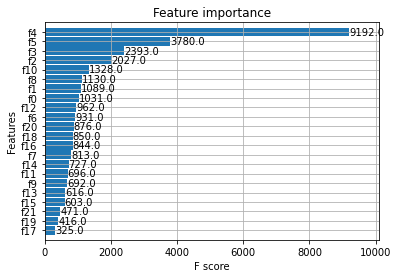

In [101]:
plt.figure(figsize=(12,8))
feature_importance = plot_importance(xgb, height=0.9)
feature_importance

In [102]:
predicted_results_v = xgb.predict(X_valid3)
predicted_results_t = xgb.predict(X_train3)
predicted_results_v= predicted_results_v.reshape(-1, 1)
predicted_results_t= predicted_results_t.reshape(-1, 1)
predicted_results_v = scaler1.inverse_transform(predicted_results_v)
predicted_results_t = scaler.inverse_transform(predicted_results_t)

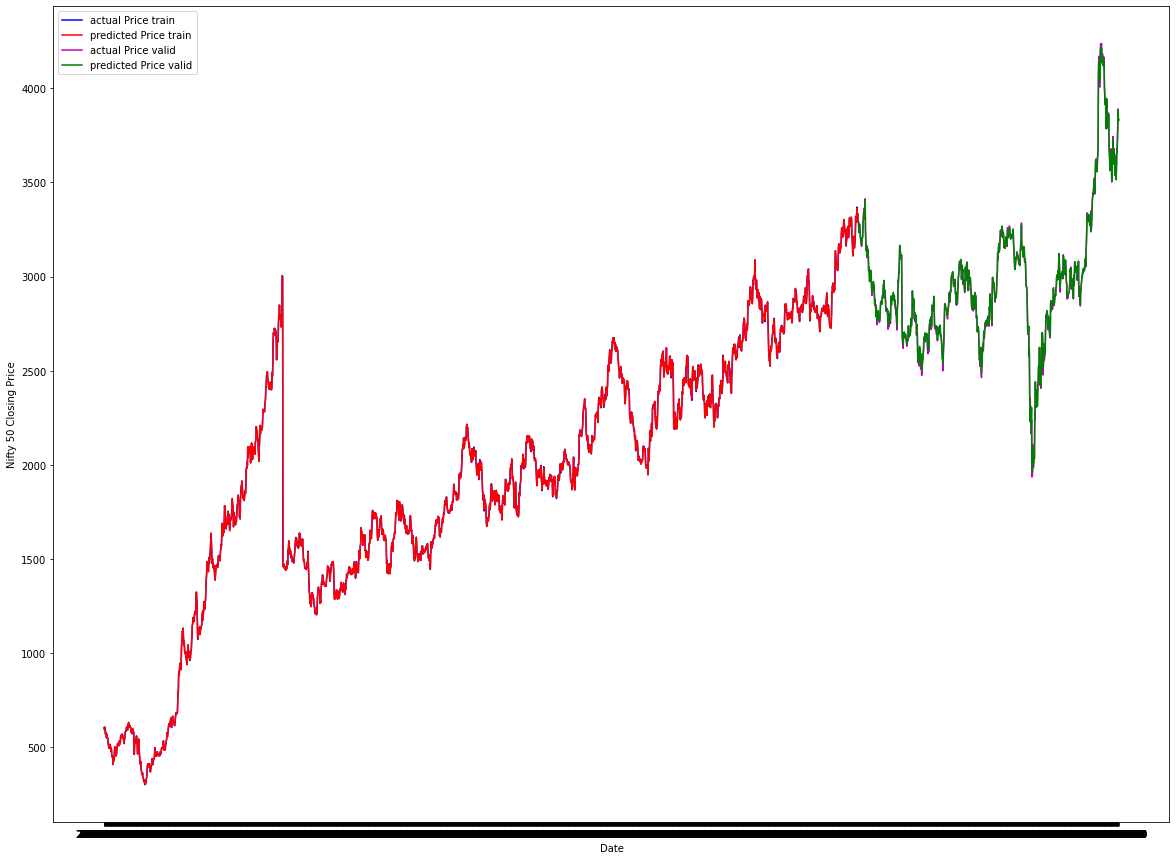

In [103]:
plt.figure(figsize=(20,15))
plt.plot(X_train2.index,list(y_train),label="actual Price train",color='b')
plt.plot(X_train2.index,list(predicted_results_t),label="predicted Price train",color='r')
plt.plot(X_valid2.index,list(y_validn),label="actual Price valid",color='m')
plt.plot(X_valid2.index,list(predicted_results_v),label="predicted Price valid",color='g')

plt.xlabel('Date')
plt.ylabel('Nifty 50 Closing Price')
plt.legend()
plt.show()